# Accuracy
Самая обычная метрика в классификации - **accuracy (точность)**. Но она не показывает качество предсказаний модели, когда классы несбалансированны.
Например, если в выборке 90% наблюдений класса 0, а оставшиеся наблюдения - класса 1 - то модель, всегда предсказывающая класс 0, будет давать accuracy равный 0.9 (на тренировочном сете)

С другой стороны, метка  accuracy может быть полезна, когда данные имеют одинаковое число представителей каждого класса

# Другие типы метрик
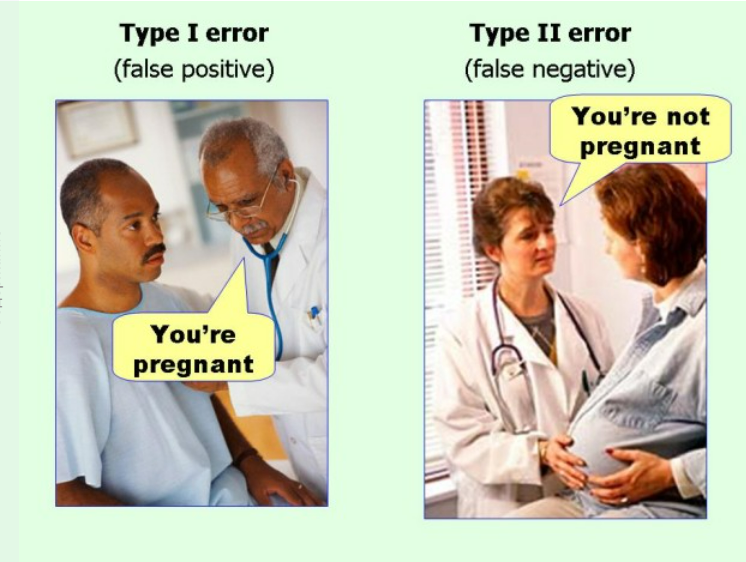

*FP* - когда мы сказали что-то такое, что не является правдой

*FN* - когда мы сказали, что правда не является правдой (*более опасная ошибка*)

**Precision** = TP / (TP + FP)

**Recall** = TP / (TP + FN)

- Эти метрики равны 1, когда модель не совершила ошибок в предсказании
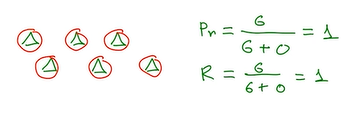

- Когда все объекты распознаны правильно, но сделаны "лишние" обнаружения:
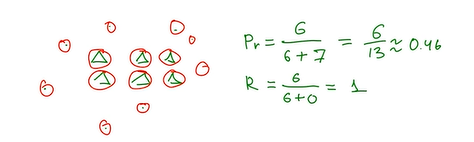

- Когда не все объекты опознаны:
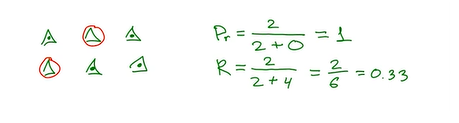


Итак, глобальное понимание метрик: классификатор может делать разные ошибки
- **Precision (точность)** : насколько хорошо получается находить положительные классы, не переплачивая ложными срабатываниями (если ложных срабатываний сильно больше, то precision уменьшается). Отметим, что precision не отвечает на вопрос, насколько хорошо модель находит положительные примеры. Она отвечает на вопрос о том, как редко модель делает ошибки обнаружения
- **Recall (полнота)** - это обратная сторона Precision. Она отвечает на вопрос о том, насколько хорошо получается найти положительные примеры, но не дает информации о том, какой % ошибок делает модель

Обратим внимание, что обе метрики имеют разную интерпретацию. Соответственно, выбор метрики зависит от целей поставленной задачи.

Часто хочется комбинировать и оптимизировать обе метрики. С этой целью используют **F-меру**:

$F = \frac{2 * Precision * Recall}{Precision + Recall}$

Можно задавать вес параметрам F-меры (например, мы хотим, чтобы более важная была Precision)

$\color{blue}{Замечание}$: в продуктовом machine learning в первую очередь смотрят на бизнес-метрики. То есть модель должна оптимизировать бизнес-метрики. А метрики типа F-меры могут выступать в качестве промежуточного звена между построением/обучением модели и внедрением в продукцию.
*Основная идея*: мы оптимизируем не качество модели, а то, как модель влияет на качество сервисов.

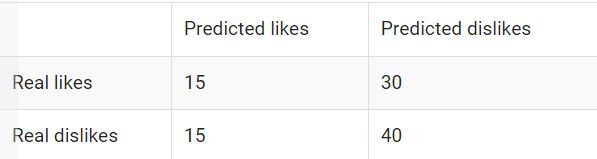

In [2]:
TP, FN = 15, 30
FP, TN = 15, 40

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

F = 2 * Precision * Recall / (Recall + Precision)
print(f'R = {Recall}, P = {Precision}, F = {F}')

R = 0.3333333333333333, P = 0.5, F = 0.4


# Задание

In [23]:
import pandas as pd
import numpy as np

np.random.seed(0)

In [24]:
data = pd.read_csv('data/songs.csv')
data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [25]:
# target
data.artist.unique()

array(['gangstarr', 'blind-guardian', 'abba'], dtype=object)

In [26]:
# check if there are missing values
data.isnull().sum()

song            0
year            0
artist          0
genre           0
lyrics          0
length          0
commas          0
exclamations    0
colons          0
hyphens         0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split


data.artist = pd.Categorical(data.artist)
data.artist = data.artist.cat.codes

data.genre = pd.Categorical(data.genre)
data.genre = data.genre.cat.codes

X = data.drop(['song', 'artist', 'lyrics'], axis=1)
y = data['artist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(f'Обучающая выборка: {X_train.shape}')
print(f'Тестовая выборка: {X_test.shape}')

Обучающая выборка: (288, 7)
Тестовая выборка: (72, 7)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score


score = pd.DataFrame(columns=['depth', 'cross-validation-mean', 'precision'])
for i in range(1, 15):
    clf = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=i)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()
    clf.fit(X_train, y_train)
    test_precision = precision_score(y_true=y_test,
                                     y_pred=clf.predict(X_test),
                                     average='micro')
    score.loc[len(score)] = [i, cross_val, test_precision]
    
score

,depth,cross-validation-mean,precision
0,1.0,0.70484,0.666667
1,2.0,1.00000,1.000000
2,3.0,1.00000,1.000000
3,4.0,1.00000,1.000000
4,5.0,1.00000,1.000000
5,6.0,1.00000,1.000000
6,7.0,1.00000,1.000000
7,8.0,1.00000,1.000000
8,9.0,1.00000,1.000000
9,10.0,1.00000,1.000000


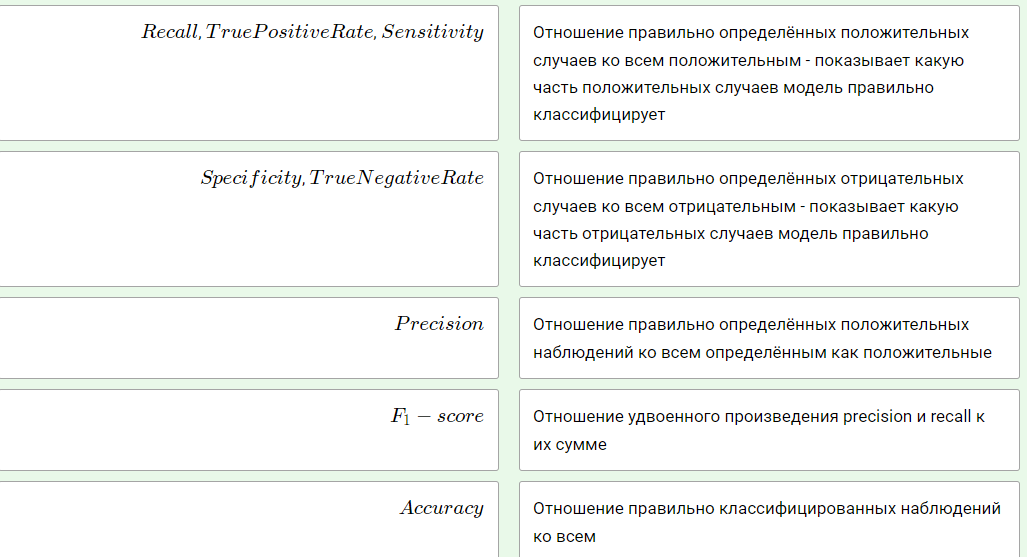